In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [97]:
df_application_train = pd.read_csv("/content/application_train.csv")
df_application_test = pd.read_csv("/content/application_test.csv")

In [98]:
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [99]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [100]:
df_application_train.duplicated(subset = ["SK_ID_CURR"]).any()

False

No duplicated records found.

In [101]:
df_application_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

## Removing columns with more than 60% missing values

In [102]:
n_rows = df_application_train.shape[0]
cols_deleted = []

for col in df_application_train.columns:
  missing_val = df_application_train[col].isnull().sum()
  percentage = np.round((missing_val/n_rows)*100, 2)

  if percentage >= 60 :
    cols_deleted.append(col)
    df_application_train.drop(columns = [col], inplace = True)

In [103]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(49), int64(41), object(15)
memory usage: 246.3+ MB


In [104]:
df_application_test.drop(columns = cols_deleted, inplace = True)

## Drop ID column as it does not contribute to the target

In [105]:
df_application_train.drop(columns = ["SK_ID_CURR"], inplace = True)
df_application_test.drop(columns = ["SK_ID_CURR"], inplace = True)

In [106]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 104 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(49), int64(40), object(15)
memory usage: 244.0+ MB


## Grouping columns based on their data types into categorical and numerical

In [107]:
cats_train = df_application_train.select_dtypes(include=['object']).columns
nums_train = df_application_test.select_dtypes(include=['int64', 'float64']).columns

In [108]:
cats_test = df_application_test.select_dtypes(include=['object']).columns
nums_test = df_application_test.select_dtypes(include=['int64', 'float64']).columns

In [109]:
nums_train.shape

(88,)

In [110]:
cats_train.shape

(15,)

## Univariate Analysis

In [71]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 30
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

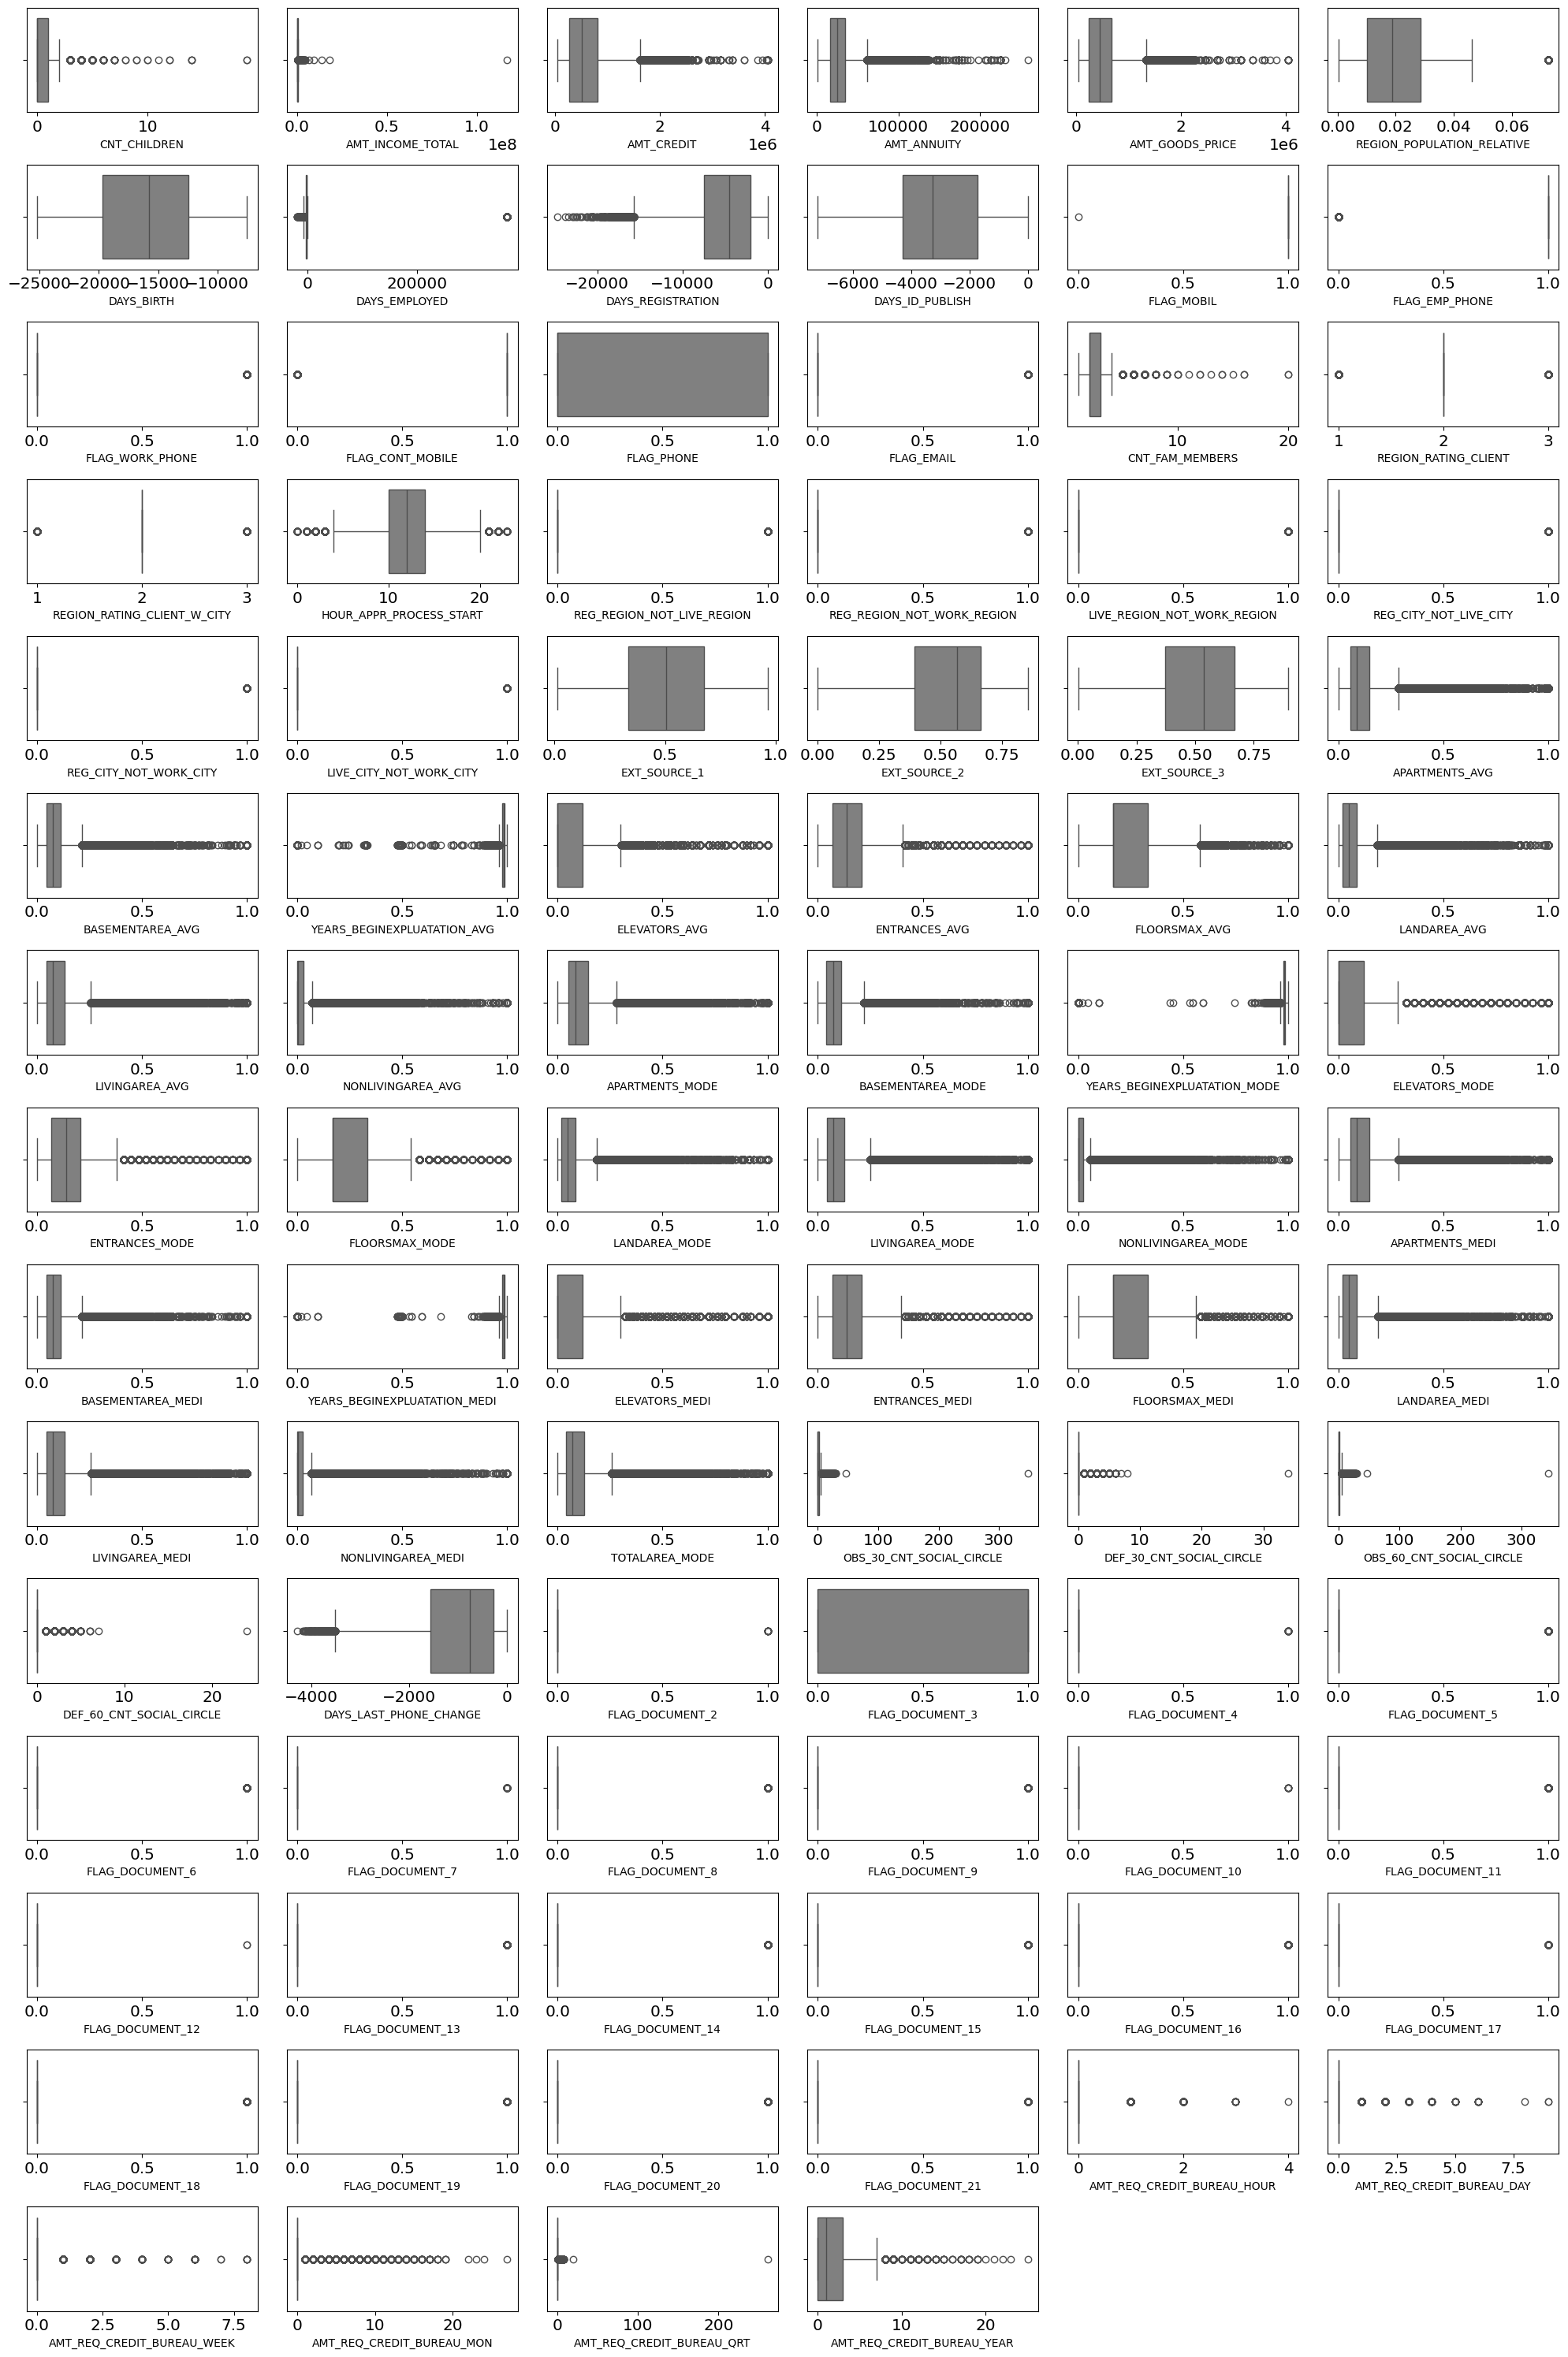

In [72]:
features = nums_train
for i in range(0, len(features)):
    plt.subplot(15, 6, i+1)
    sns.boxplot(x=df_application_train[features[i]], color='grey', orient='h')
    plt.tight_layout()

## Multivariate Analysis

In [113]:
correlations = df_application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Postive Correlations:
 FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
R

In [111]:
def check_redundant(df, threshold):
    df_loop = df.copy()
    redundant = [
                [],[],[]
                ]

    for index, row in df_loop.iterrows():
        # print(df_loop.loc[index,'Age'])
        for i in row.index.values:
            if (len(redundant[0]) == 0) | ((index+' - '+i not in redundant[2]) & (i+' - '+index not in redundant[2])) :
                val = df_loop.loc[index,i]
                if (abs(val) >= threshold) & (val != 1.0) :
                    redundant[0].append(index)
                    redundant[1].append(i)
                    redundant[2].append(index + ' - ' + i)

    for i in redundant[2]:
        print(i)


In [115]:
check_redundant(df_application_train.corr(), 0.7)

CNT_CHILDREN - CNT_FAM_MEMBERS
AMT_CREDIT - AMT_ANNUITY
AMT_CREDIT - AMT_GOODS_PRICE
AMT_ANNUITY - AMT_GOODS_PRICE
DAYS_EMPLOYED - FLAG_EMP_PHONE
REGION_RATING_CLIENT - REGION_RATING_CLIENT_W_CITY
REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_WORK_CITY - LIVE_CITY_NOT_WORK_CITY
APARTMENTS_AVG - ELEVATORS_AVG
APARTMENTS_AVG - LIVINGAREA_AVG
APARTMENTS_AVG - APARTMENTS_MODE
APARTMENTS_AVG - ELEVATORS_MODE
APARTMENTS_AVG - LIVINGAREA_MODE
APARTMENTS_AVG - APARTMENTS_MEDI
APARTMENTS_AVG - ELEVATORS_MEDI
APARTMENTS_AVG - LIVINGAREA_MEDI
APARTMENTS_AVG - TOTALAREA_MODE
BASEMENTAREA_AVG - BASEMENTAREA_MODE
BASEMENTAREA_AVG - BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_AVG - YEARS_BEGINEXPLUATATION_MODE
YEARS_BEGINEXPLUATATION_AVG - YEARS_BEGINEXPLUATATION_MEDI
ELEVATORS_AVG - LIVINGAREA_AVG
ELEVATORS_AVG - APARTMENTS_MODE
ELEVATORS_AVG - ELEVATORS_MODE
ELEVATORS_AVG - LIVINGAREA_MODE
ELEVATORS_AVG - APARTMENTS_MEDI
ELEVATORS_AVG - ELEVATORS_MEDI
ELEVATORS_AVG - LIVINGARE